### shubham birari (ml 16)

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\shubh\symbiosis ml16\datasets\delivery-driver.tsv" , sep='\t')

In [3]:
df

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
...,...,...,...
3995,3423310685,160.04,10.0
3996,3423312600,176.17,5.0
3997,3423312921,170.91,12.0
3998,3423313630,176.14,5.0


In [4]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         4000 non-null   int64  
 1   Distance_Feature  4000 non-null   float64
 2   Speeding_Feature  4000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 93.9 KB


In [6]:
X = df[['Distance_Feature', 'Speeding_Feature']]

In [7]:
X.head()

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K means

In [9]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeansoutput=kmeans.fit(X)

In [10]:
kmeans.cluster_centers_

array([[180.34311782,  10.52011494],
       [ 49.98428468,   5.21441441],
       [177.83509615,  70.28846154],
       [ 50.46127059,  32.42823529]])

In [11]:
kmeans.inertia_

719601.5383469046

In [12]:
centers = kmeans.cluster_centers_

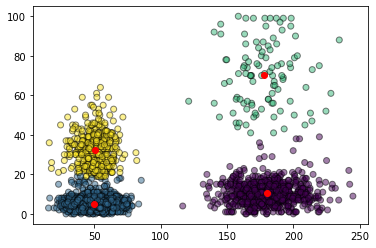

In [14]:
plt.scatter(X['Distance_Feature'], X['Speeding_Feature'], c=kmeansoutput.labels_.astype(float), alpha=0.5, edgecolor='k')
for i in range(len(np.unique(kmeans.labels_))):
     plt.scatter(centers[i][0], centers[i][1], c='r')

In [15]:
SSD=[]
cl=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    y=km.fit_predict(X)
    cl.append(i)
    SSD.append(km.inertia_)

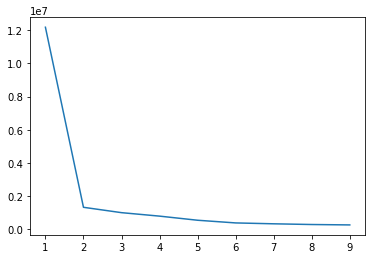

In [16]:
plt.plot(cl,SSD)

### Hierarchical _Clustering

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage  
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

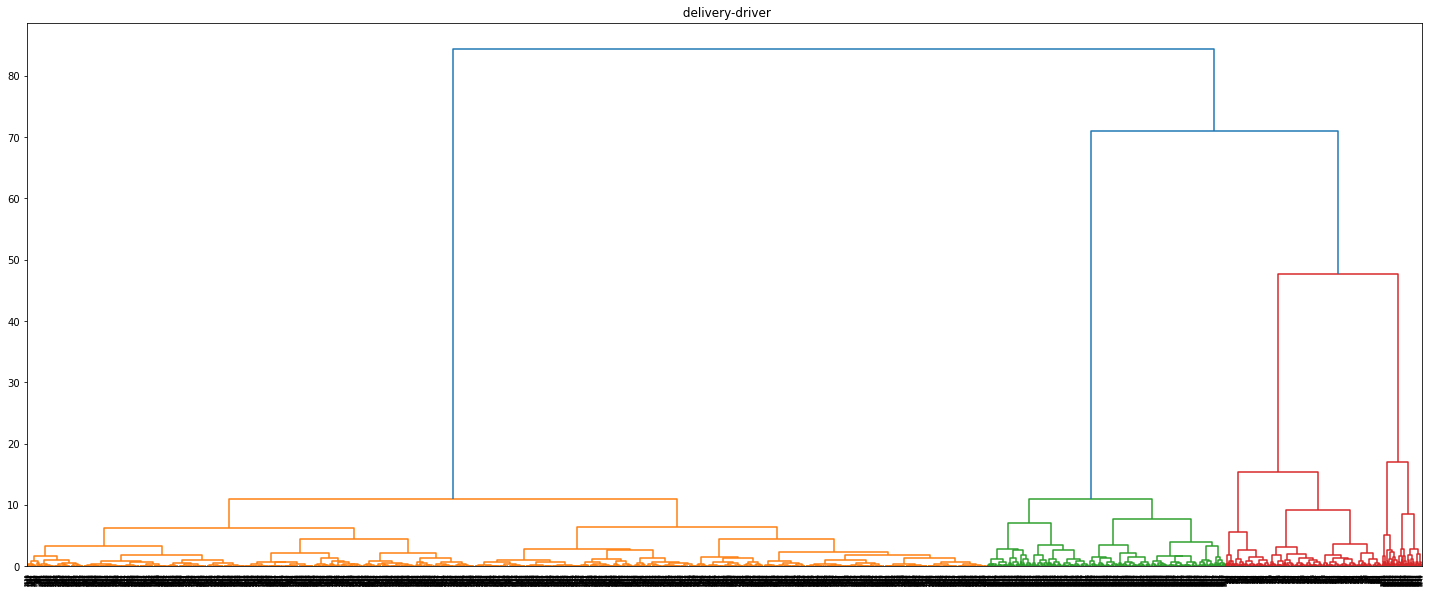

In [18]:
plt.figure(figsize=(25,10))
plt.title(" delivery-driver")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))  

In [19]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_scaled)  

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

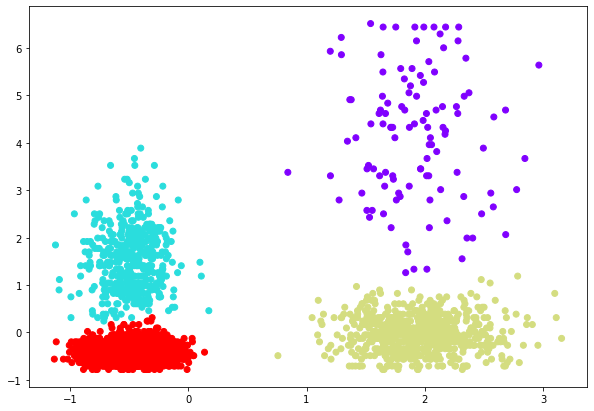

In [22]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=cluster.labels_, cmap='rainbow')   

### DBSCANE

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
dbscan = DBSCAN()
dbscan.fit(X_scaled)

DBSCAN()

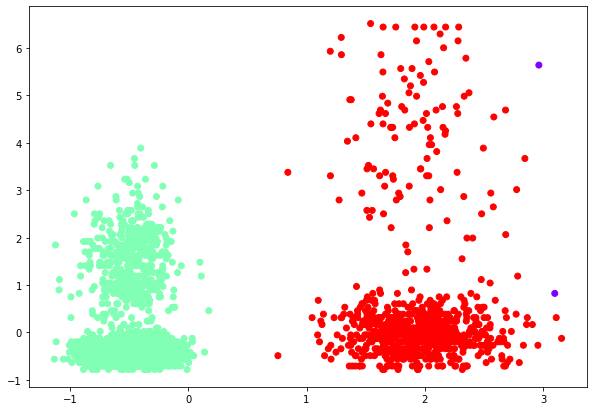

In [25]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=dbscan.labels_, cmap='rainbow')  